In [95]:
import pickle
import sklearn.metrics
import numpy as np
with open('pred_gt.pickle', mode='rb') as f:
    pr0,pr1,pr2, gt0,gt1,gt2 = pickle.load(f)

def softmax(x):
    u = np.sum(np.exp(x))
    return np.exp(x)/u

pr0 = np.array( [softmax(e) for e in pr0] )
pr1 = np.array( [softmax(e) for e in pr1] )
pr2 = np.array( [softmax(e) for e in pr2] )
                 

In [96]:
COUNT_GRAPHEME = [147, 145, 337, 318, 331, 175, 308, 153, 157, 444, 152, 151, 146, 5420, 796, 1083, 940, 761, 1633, 278, 336, 942, 2961, 5149, 336, 1127, 171, 305, 759, 2780, 437, 768, 1127, 136, 276, 476, 1024, 285, 3354, 617, 757, 305, 1957, 3630, 1057, 144, 580, 452, 1376, 321, 738, 326, 935, 3690, 592, 1680, 2688, 633, 1285, 2339, 426, 575, 868, 149, 5596, 1365, 786, 475, 631, 757, 957, 2936, 5736, 130, 1518, 1127, 1936, 957, 293, 3458, 456, 3438, 292, 1418, 460, 1363, 2094, 168, 760, 2313, 627, 1539, 1116, 622, 973, 727, 4926, 481, 627, 458, 448, 1083, 141, 3461, 160, 151, 751, 5321, 158, 908, 342, 787, 886, 4395, 150, 4015, 436, 1531, 1139, 1537, 1207, 462, 2313, 2073, 2188, 813, 159, 927, 952, 978, 144, 443, 1039, 4374, 623, 637, 1051, 562, 934, 2312, 883, 1746, 1067, 609, 612, 317, 302, 4392, 1723, 2402, 2311, 1248, 607, 1553, 732, 928, 790, 324, 143, 3281, 480, 311, 465, 165, 164, 1142, 307, 1585]
COUNT_VOWEL = [41508, 36886, 25967, 16152, 18848, 5297, 4336, 28723, 3528, 16032, 3563]
COUNT_CONSONANT = [125278, 7424, 23465, 619, 21270, 21397, 1387]

In [97]:
def metric(gt, pred):
    return sklearn.metrics.recall_score(gt, pred, average='macro')

In [98]:
print( metric(gt0, pr0.argmax(axis=-1)) )
print( metric(gt1, pr1.argmax(axis=-1)) )
print( metric(gt2, pr2.argmax(axis=-1)) )

0.9632477703365571
0.9873846554943704
0.982857124238917


In [100]:
0.5 * metric(gt0, (pr0).argmax(axis=-1)) + 0.25* metric(gt1, (pr1).argmax(axis=-1)) + 0.25 * metric(gt2, (pr2).argmax(axis=-1)) 

0.9741843301016004

In [93]:
print( metric(gt0, (pr0 / COUNT_GRAPHEME ).argmax(axis=-1)) )
print( metric(gt1, (pr1 / COUNT_VOWEL    ).argmax(axis=-1)) )
print( metric(gt2, (pr2 / COUNT_CONSONANT).argmax(axis=-1)) )

0.9651854465960567
0.9886514400502068
0.9852756173771275


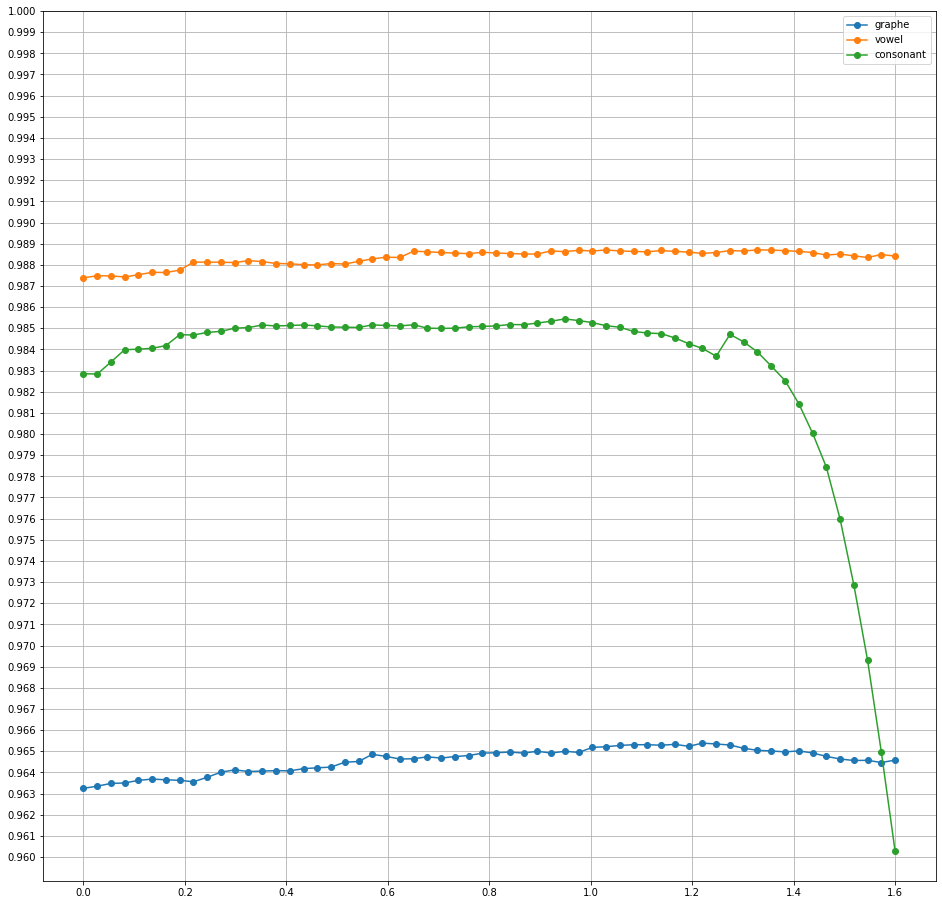

In [127]:
arr = []
parr = np.linspace(0, 1.6, 60)
for p in parr:
    s0 = metric(gt0, (pr0 / np.power(COUNT_GRAPHEME, p) ).argmax(axis=-1))
    s1 = metric(gt1, (pr1 / np.power(COUNT_VOWEL,    p) ).argmax(axis=-1))
    s2 = metric(gt2, (pr2 / np.power(COUNT_CONSONANT,p) ).argmax(axis=-1)) 
    arr.append([s0,s1,s2])
arr = np.array(arr)

plt.figure(figsize=(16,16))

plt.plot(parr, arr[:,0], "o-", label="graphe")
plt.plot(parr, arr[:,1], "o-", label="vowel")
plt.plot(parr, arr[:,2], "o-", label="consonant")

plt.grid()
plt.yticks(np.linspace(0.96,1, 41))
plt.legend()
plt.show()

In [99]:
0.5 * metric(gt0, (pr0 / COUNT_GRAPHEME ).argmax(axis=-1)) + 0.25* metric(gt1, (pr1 / COUNT_VOWEL    ).argmax(axis=-1)) + 0.25 * metric(gt2, (pr2 / COUNT_CONSONANT).argmax(axis=-1)) 

0.9760744876548619

(array([  4.,   0.,   0.,   1.,   2.,   0.,   1.,   0.,   2., 270.]),
 array([4.0477765e-04, 1.0034924e-01, 2.0029370e-01, 3.0023816e-01,
        4.0018260e-01, 5.0012708e-01, 6.0007155e-01, 7.0001602e-01,
        7.9996043e-01, 8.9990491e-01, 9.9984938e-01], dtype=float32),
 <a list of 10 Patch objects>)

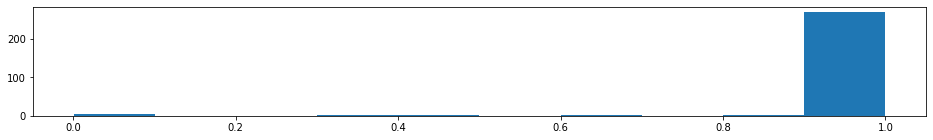

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,2))
#pr2[gt2==6][:, 6 ].size  # gt is 6, check prob of 6
#sns.distplot( pr2[gt2==6][:, 6 ] )  # gt is 6, check prob of 6
plt.hist( pr2[gt2==6][:, 6 ] )  # gt is 6, check prob of 6

In [59]:
arr = np.where( np.bitwise_and( gt2==6 , pr2[:,6] < 0.5) )
arr

(array([ 1511,  2749, 10571, 20592, 24893, 26098, 26981]),)

In [60]:
for e in arr:
    print( ( pr2[e] * 100 ).astype(int) )

[[ 0  0  0  0 53  0 45]
 [ 1  0  0  0 98  0  0]
 [ 0  0  0  0 99  0  0]
 [ 0  0  1  0 59  0 37]
 [ 0  0  0  0 98  0  0]
 [ 4  0  0  0  0 93  1]
 [ 6  0  1  0  0 48 42]]


In [71]:
def print_mayoi(true_class_dx):
    arr = np.where( np.bitwise_and( gt2==true_class_dx , pr2[:,true_class_dx] < 0.5) )
    for dx in arr:
        print( ( pr2[dx] * 100 ).astype(int) )

In [76]:
print_mayoi(6) # それなりにまよっていることがわかる
#print_mayoi(5)

[[ 0  0  0  0 53  0 45]
 [ 1  0  0  0 98  0  0]
 [ 0  0  0  0 99  0  0]
 [ 0  0  1  0 59  0 37]
 [ 0  0  0  0 98  0  0]
 [ 4  0  0  0  0 93  1]
 [ 6  0  1  0  0 48 42]]


In [80]:
pred2 = []
for e in pr2:
    pred2.append( ( e / COUNT_CONSONANT).argmax() )

In [82]:
metric(gt2, pred2)

0.9852756173771275